# **Dimensionality Reduction and LDA**
Author: Dayne N. Fradejas 
---



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import manifold
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Spotify_Youtube.csv")

# remove 1st column of values
df = df.drop(df.columns[0], axis=1)

# drop rows with NaN values
df = df.dropna()

## Spotify-Youtube Tracks Visualization

a.) Perform Expoloratory Data Analysis

In [4]:
# Top 10 Artist with most views
total_count = df.groupby(['Artist']).sum()

print("Top 10 Artist with most views")
(total_count.sort_values(by='Views', ascending=False).head(10)).loc[:, ['Views']]

Top 10 Artist with most views


,Views
Artist,
Ed Sheeran,1.546021e+10
CoComelon,1.460167e+10
Katy Perry,1.312063e+10
Charlie Puth,1.216759e+10
Luis Fonsi,1.162811e+10
Justin Bieber,1.099079e+10
Daddy Yankee,1.086828e+10
Bruno Mars,1.023184e+10
Macklemore & Ryan Lewis,1.012206e+10


In [5]:
# Top 10 Artist with most comments
print("Top 10 Artist with most comments")
(total_count.sort_values(by='Comments', ascending=False).head(10)).loc[:, ['Comments']]

Top 10 Artist with most comments


,Comments
Artist,
BTS,39542659.0
BLACKPINK,19605027.0
Stray Kids,8458365.0
TWICE,8384985.0
PSY,7311608.0
Justin Bieber,7258967.0
EXO,6981950.0
Halsey,6981661.0
One Direction,6360892.0


In [282]:
# Top 10 Tracks with most views
total_count = df.groupby(['Track']).sum()

print("Top 10 Tracks with most views")
(total_count.sort_values(by='Views', ascending=False).head(10)).loc[:, ['Views']]

Top 10 Tracks with most views


,Views
Track,
Despacito,1.615930e+10
See You Again (feat. Charlie Puth),1.154760e+10
Lean On,6.649670e+09
Shape of You,5.908398e+09
Calma - Remix,5.322011e+09
This Is What You Came For,5.252060e+09
Swalla (feat. Nicki Minaj & Ty Dolla $ign),5.162404e+09
Wheels on the Bus,4.898831e+09
"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4.828403e+09


In [283]:
# Top 10 Tracks with most comments
print("Top 10 Tracks with most comments")
(total_count.sort_values(by='Comments', ascending=False).head(10)).loc[:, ['Comments']]

Top 10 Tracks with most comments


,Comments
Track,
Dynamite,16138145.0
Boy With Luv (feat. Halsey),13071440.0
Butter,9131761.0
Despacito,8505582.0
Gangnam Style (강남스타일),5331537.0
How You Like That,5130725.0
Baby,4817531.0
See You Again (feat. Charlie Puth),4254691.0
Pink Venom,3637659.0


b.) Choose three nonlinear dimensionality reduction methods

In [284]:
# only select features needed
feautures = pd.DataFrame()
features = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
               'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
               'Views','Likes','Comments']].copy()

# Encode Label in the data
features['label'] = LabelEncoder().fit_transform(df['Artist'])

# Select only 40% of the rows
features = features.sample(frac=0.40)

# scale data using StandardScaler()
df_scale = StandardScaler().fit_transform(features)

## Using KernelPCA

In [285]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.5)
sy_kpca = kpca.fit_transform(df_scale)

## Using ISO

In [286]:
iso = manifold.Isomap(n_neighbors=15, n_components=2)
sy_iso = iso.fit_transform(df_scale)

## Using t-SNE

In [287]:
tsne = manifold.TSNE(n_components=2, random_state=85, init = 'random', learning_rate= 'auto')
sy_tsne = tsne.fit_transform(df_scale)

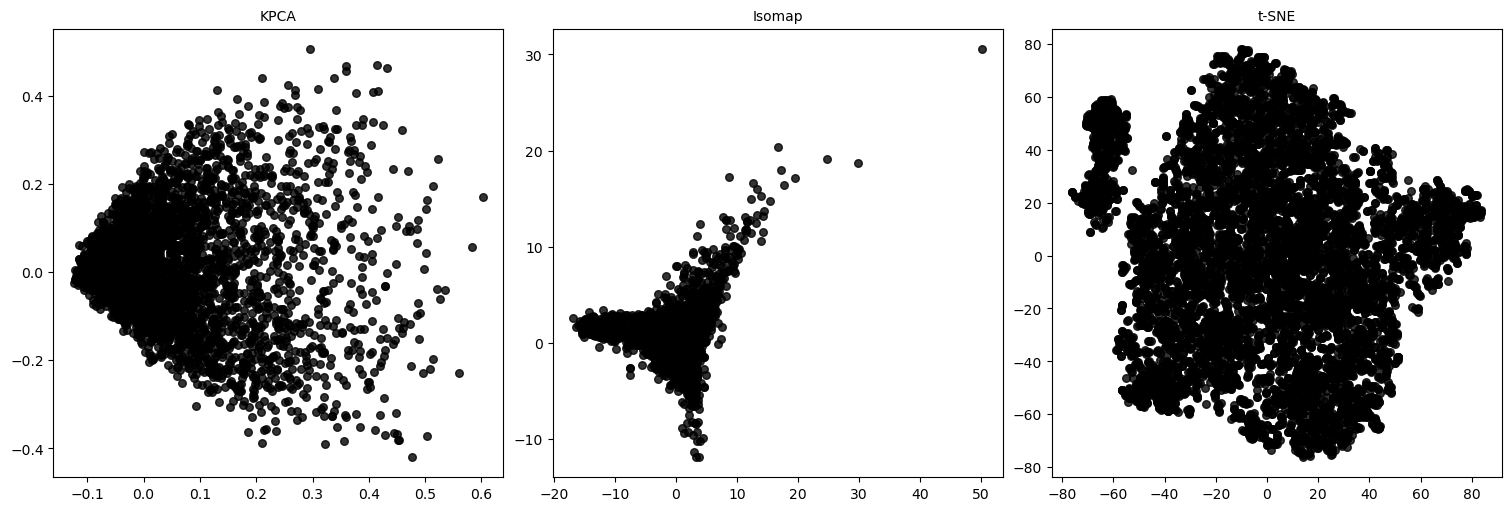

In [288]:
# Graph
x1, y1 = sy_kpca.T
x2, y2 = sy_iso.T
x3, y3 = sy_tsne.T
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                       facecolor="white", 
                       constrained_layout=True)

# KPCA
ax1.scatter(x1, y1, c='black', s=30, alpha=0.8)
ax1.set_title('KPCA', size=10)

#LLE
ax2.scatter(x2, y2, c='black', s=30, alpha=0.8)
ax2.set_title('ISO map', size=10)

#t-SNE
ax3.scatter(x3, y3, c='black', s=30, alpha=0.8)
ax3.set_title('t-SNE', size=10)
fig.set_figheight(5)
fig.set_figwidth(15)
plt.show()

Upon observing the different graphs for KPCA, Isomap, and t-SNE, the details of the graph is somehow vague to give an analysis. However, one noticeable fact is that for **isomap**, there is a **small dot** in the **upper right corner** which can also mean something. In the **t-SNE**, the population group on the **left side of the graph** can also mean something.

c.) Redo the 3 visualizations as in item (a), but this time, color the points based on the Artist after Label Encoding.

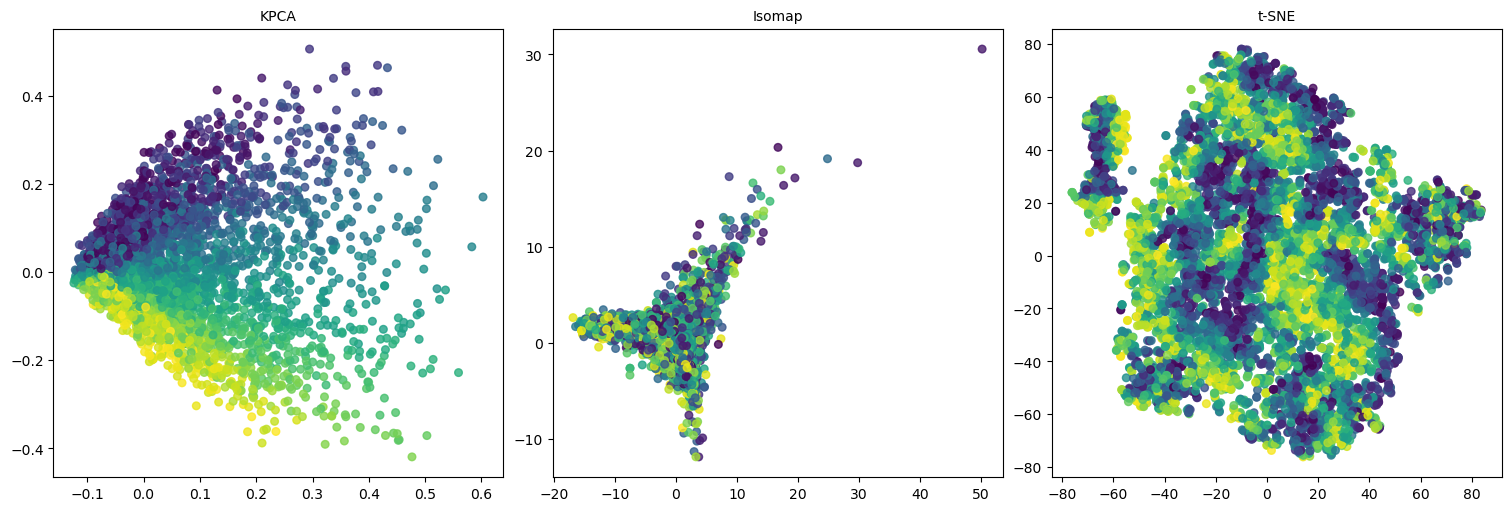

In [310]:
# Graph
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                       facecolor="white", 
                       constrained_layout=True)

# KPCA
ax1.scatter(x1, y1, c=features['label'], s=30, alpha=0.8)
ax1.set_title('KPCA', size=10)

#LLE
ax2.scatter(x2, y2, c=features['label'], s=30, alpha=0.8)
ax2.set_title('Isomap', size=10)

#t-SNE
ax3.scatter(x3, y3,c=features['label'], s=30, alpha=0.8)
ax3.set_title('t-SNE', size=10)

fig.set_figheight(5)
fig.set_figwidth(15)

plt.show()

When hue has been added in the graph, there are some few insights that we can draw out of it.
1. KPCA and t-SNE shows the relationship of the different music genre wherein the new generation music are somehow similar in terms of different factors. Also, it is noticeable that majority of artists' music track have similar composition to their other tracks makes it "somehow" unique for them.
2. Another factor that can be seen in **t-SNE**, there are artists that has a slight different feauture than the other as seen in the scatter plot. Note: Only 40% of the data is used in the interpretation.
3. KPCA clearly shows the different relationship of artists and how they are related from one antoher.

d.) Redo the 3 visualizations as in item (a), but this time, color the points based on the:
1. Number of views
2. Number of comments
3. Number of likes

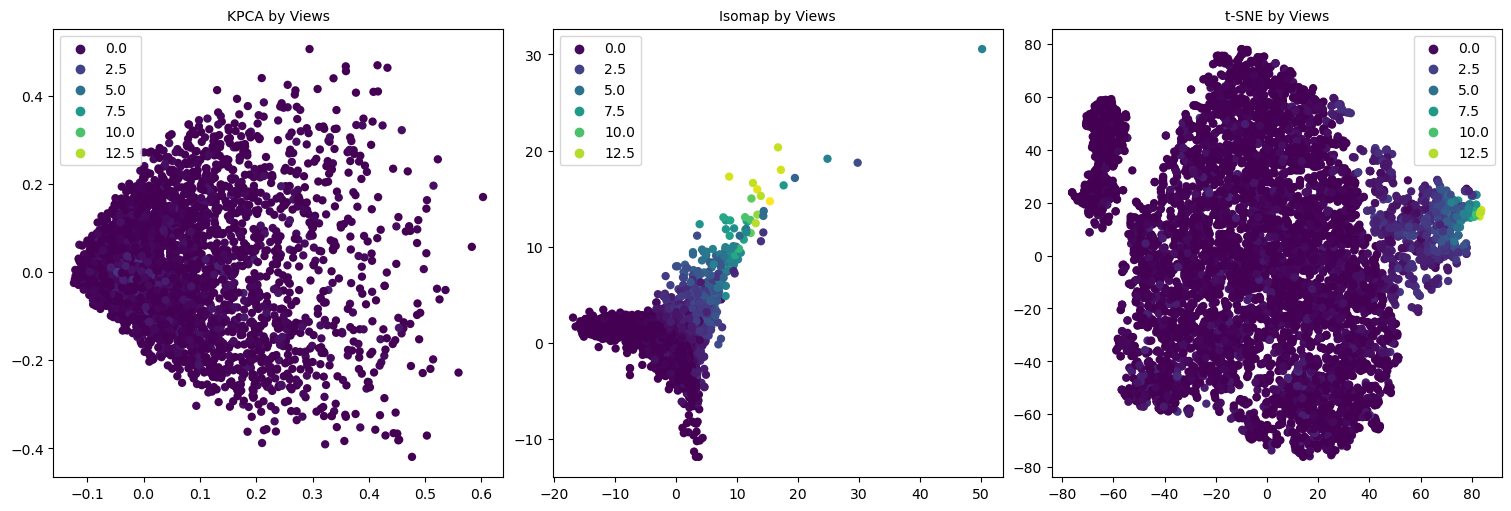

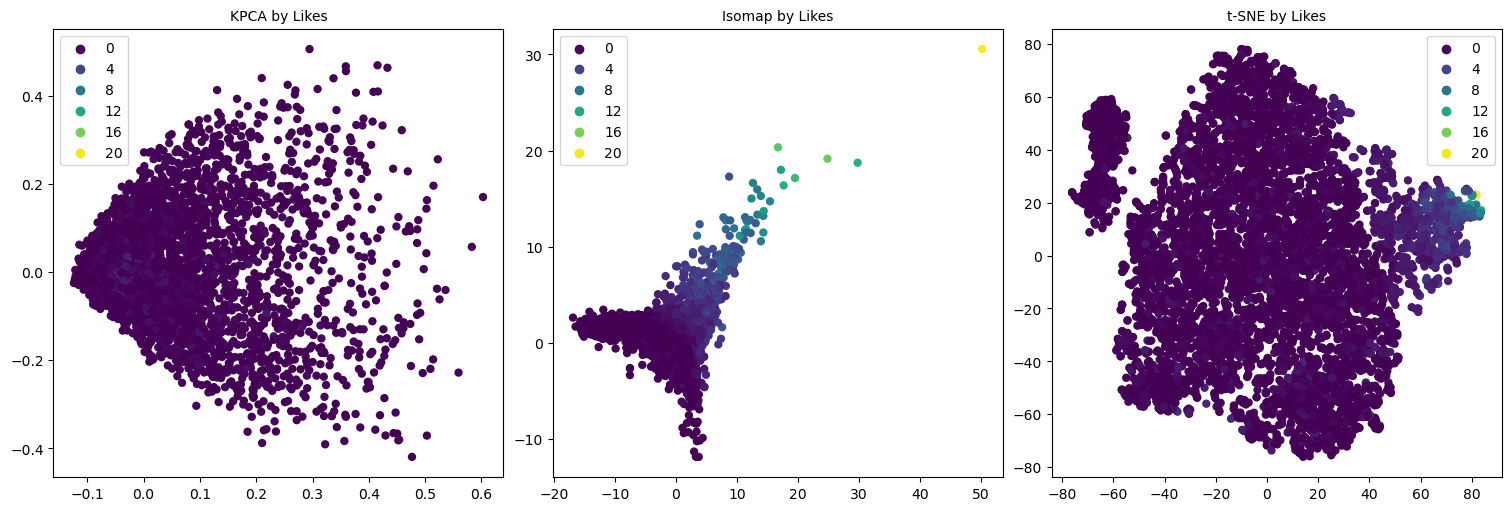

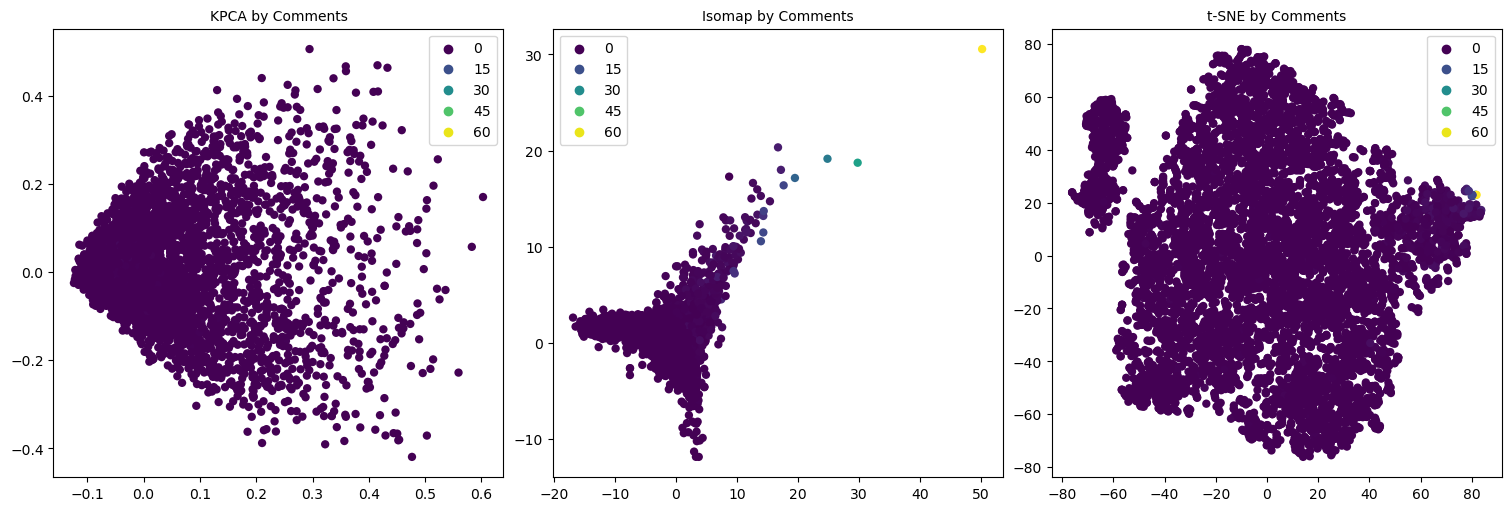

In [314]:
import seaborn as sns

label = ['Views', 'Likes', 'Comments']
l_index = [-4, -3, -2]

for title, index in zip(label, l_index):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                           facecolor="white", 
                           constrained_layout=True)

    sns.scatterplot(data=sy_kpca, x=x1, y=y1, hue=df_scale[:,index],palette='viridis', edgecolor='none', ax = ax1)
    ax1.set_title('KPCA by '+title, size=10)

    sns.scatterplot(data=sy_lle, x=x2, y=y2, hue=df_scale[:,index],palette='viridis', edgecolor='none', ax=ax2)
    ax2.set_title('Isomap by '+title, size=10)

    ax3 = sns.scatterplot(data=sy_tsne, x=x3, y=y3, hue=df_scale[:,index], palette='viridis',edgecolor='none',  ax=ax3)
    ax3.set_title('t-SNE by '+title, size=10)

    fig.set_figheight(5)
    fig.set_figwidth(15)

    plt.show()

In changing the hue of the different scatter plots, one noticeable fact is that there are various artists with similar feautures that gathered massive views, likes, and comments. It is a common knowledge when there are massive views, it is expected to have massive likes and comments at the same time. However, it is a different case for the **Isomap** where in, even the point at the **top right corner** of the plot didn't have the most views, it did have the most likes and most comments which can also be based with other factors. 

## Conclusion
Even with the current data that we have, it is still too vague to draw out conclusions but it is still a good step to also give few analysis of how the different features can relate from one another in increasing the number of views, comments, and likes. The three nonlinear dimensionality reduction methods used here was KPCA, ISOmap, and t-SNE as it shows the best result based in the behavior of the graph and how information can be extracted from it. 
